IMPORTING DATA & PREPROCESSING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
import os

path = os.listdir('DATA/Training/')
classes = {'no_tumor': 0, 'pituitary_tumor': 1}

In [3]:
import cv2

X = []
Y = []
for cls in classes:
    pth = 'DATA/Training/' + cls
    for j in os.listdir(pth):
        img = cv2.imread(pth + '/' + j, 0)
        img = cv2.resize(img, (200, 200))
        X.append(img)
        Y.append(classes[cls])

In [4]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [5]:
np.unique(Y)

array([0, 1])

In [6]:
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

In [7]:
X.shape, X_updated.shape

((1222, 200, 200), (1222, 40000))

VISUALIZING DATA

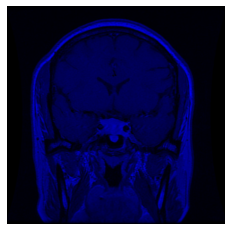

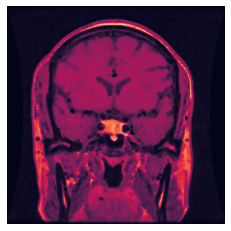

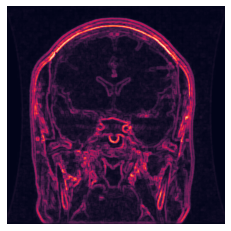

In [8]:
from skimage.color import rgb2hsv
from matplotlib.pyplot import imshow
import cv2

img = cv2.imread('DATA/Training/pituitary_tumor/p (50).jpg')
hsv = rgb2hsv(img)
plt.figure()
plt.axis('off')
imshow(hsv)
plt.show()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(gray,kernel,iterations = 1)
plt.figure()
plt.axis('off')
imshow(erosion)
plt.show()

gradient = cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, kernel)
plt.figure()
plt.axis('off')
imshow(gradient)
plt.show()

SPLIT DATA

In [9]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                                test_size=.20)

In [10]:
xtrain.shape, xtest.shape

((977, 40000), (245, 40000))

FEATURE SCALING

In [11]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain / 255
xtest = xtest / 255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


Feature Selection: PCA

In [12]:
from sklearn.decomposition import PCA

print(xtrain.shape, xtest.shape)

pca = PCA(.98)
pca_train = pca.fit_transform(xtrain)
pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(977, 40000) (245, 40000)


SVM MODEL

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

sv = make_pipeline(StandardScaler(), SVC(gamma='auto'))
sv.fit(xtrain, ytrain)

print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9989764585465711
Testing Score: 0.9755102040816327


CONFUSION MATRIX

Confusion Matrix


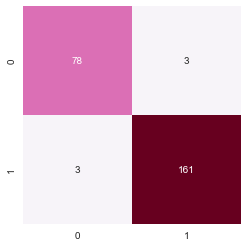

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

pred = sv.predict(xtest)

matrix = confusion_matrix(ytest,pred)
print("Confusion Matrix")
sns.heatmap(matrix, square=True, annot=True, cmap='PuRd', fmt='d', cbar=False)
plt.show()

EVALUATION METRICS

In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision: %.3f' % precision_score(ytest, pred))
print('Recall: %.3f' % recall_score(ytest, pred))
print('F1-Score: %.3f' % f1_score(ytest, pred))

Precision: 0.982
Recall: 0.982
F1-Score: 0.982


In [16]:
dec = {0: 'No Tumor', 1: 'Positive Tumor'}

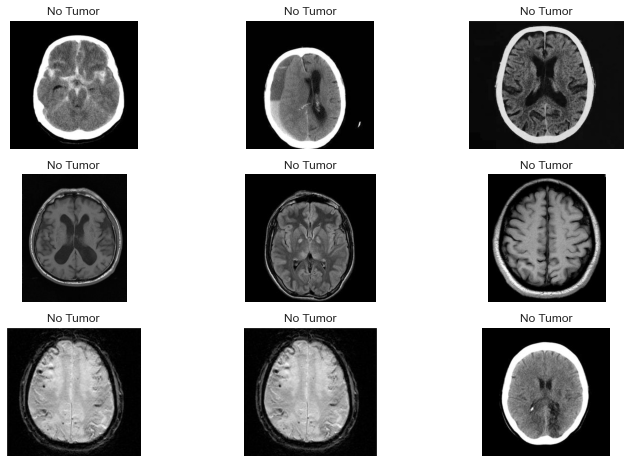

In [17]:
plt.figure(figsize=(12, 8))
p = os.listdir('DATA/Testing/')
c = 1
for i in os.listdir('DATA/Testing/no_tumor/')[:9]:
    plt.subplot(3, 3, c)

    img = cv2.imread('DATA//Testing/no_tumor/' + i, 0)
    img1 = cv2.resize(img, (200, 200))
    img1 = img1.reshape(1, -1) / 255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c += 1

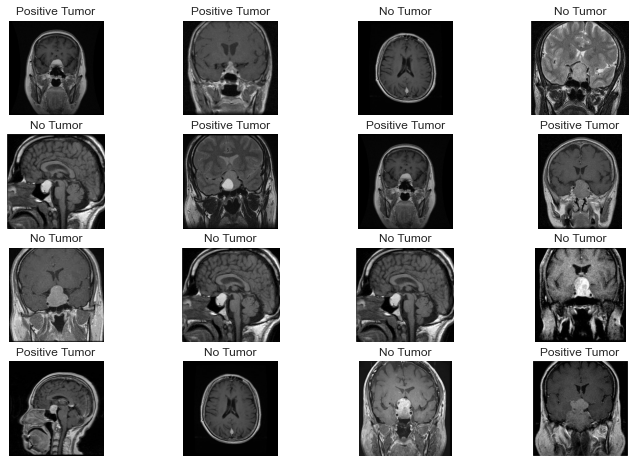

In [18]:
plt.figure(figsize=(12, 8))
p = os.listdir('DATA/Testing/')
c = 1
for i in os.listdir('DATA/Testing/pituitary_tumor/')[32:48]:
    plt.subplot(4, 4, c)

    img = cv2.imread('DATA//Testing/pituitary_tumor/' + i, 0)
    img1 = cv2.resize(img, (200, 200))
    img1 = img1.reshape(1, -1) / 255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c += 1